### Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy.random import random, seed, normal

## From local directory
from oscillators import *

%matplotlib inline

### Avalanches in the order parameter

Define system and parameters

In [15]:
NVAL = 40
np.random.seed(0)
mult_factor = 2
t_len = 250*mult_factor


wmn = 0
w_set = normal(1, 0.2, NVAL)
ic = np.pi*random(NVAL)
tvals = np.linspace(0, t_len, 1000*mult_factor)
ts = CoupledOscillators(NVAL, 
                        w_set, 
                        0.4*np.ones((NVAL, NVAL)), 
                        repulsion="gaussian",
                        repel_val=0.8, 
                        repel_length=1.02, 
                        num_repel=NVAL)
f = lambda t, y: ts.dyn_eq(y, t)
j = lambda t, y: ts.jac(y, t)


Perform numerical integration

In [ ]:
## Perform Numerical Integration
from scipy.integrate import solve_ivp
sol = solve_ivp(f, (0, t_len), ic, t_eval=tvals, jac=j, vectorized=True, method="LSODA", max_step=1e-4)
out = np.copy(sol.y.T)

Calculate order parameter and plot

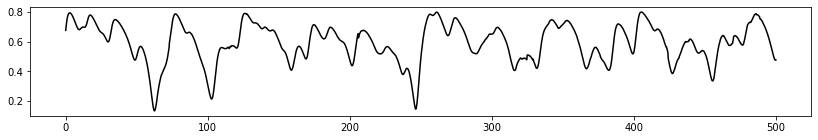

In [17]:
## Calculate order parameter
r1, _ = find_daido(out)

## Plot results
plt.figure(figsize=(14,2))
plt.plot(tvals, r1, 'k')